# Lecture 4 Workbook
## Parametric methods
This is a workbook that contains the python code that was used in slides
appearing in the lecture. It is provided so that you can see for yourself
how this code works.

## Definitions and setup
Code here is just for making everything look sort of *uniform*

In [145]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2, norm, t
from matplotlib.ticker import ScalarFormatter
import pandas as pd

# course_data = 'https://github.com/opherdonchin/StatisticalComputationAndAnalysis/raw/main/Data/'
course_data = os.path.join("..", "Data")


In [115]:
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 10

This is the seed for the random number generator. Graphs for the course will be generated with seed 367 (for BME). You can change it or use 'shuffle' to get different pseudo-random numbers each time.

In [116]:
np.random.seed(367)

## Load data
Load data on cerebellar volumes

In [117]:
d = pd.read_csv(os.path.join(course_data, 'cerebellar_volumes.csv'))


## A confidence interval for the mean

### Show distribution of mean for models
Superimposed on the data.

In [118]:
TCV_Corr = d.TCV_Corr
numCblm = 60

# Randomly sample 60 cerebellar volumes
cblmSample = TCV_Corr.sample(numCblm)
xBarSample = np.mean(cblmSample)
sSample = np.std(cblmSample)
NSample = len(cblmSample)

In [119]:
model1Mu = np.max(cblmSample)
model2Mu = xBarSample - 2*sSample/np.sqrt(NSample)
modelSMu = sSample/np.sqrt(NSample)


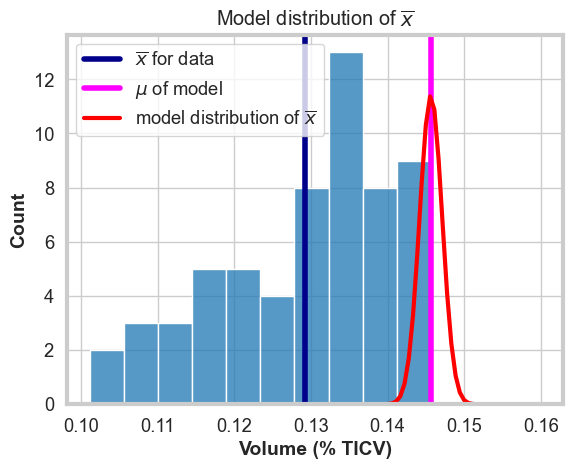

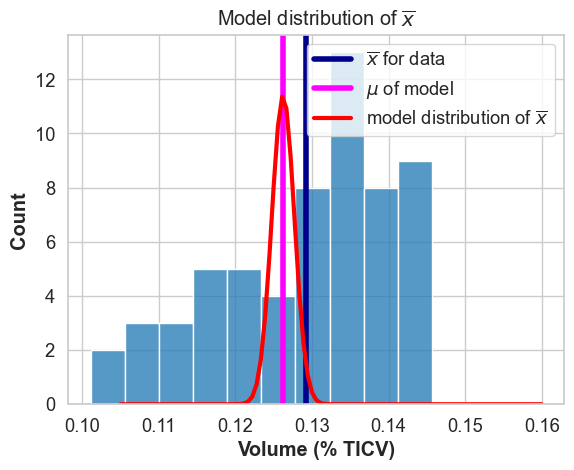

In [120]:

def drawSample(sample, model_mu, model_s):
  n_bins = 10
  xbar = np.mean(sample)
  x_norm = np.linspace(start=0.105, stop=0.16, num=100)
  norm_scale = 2*np.sqrt(2*np.pi)*model_s*len(sample)*0.95/n_bins;


  # Plot a histogram of the sample using Seaborn
  sns.histplot(data=sample, kde=False, bins=10)
  sns.set_style("whitegrid")
  sns.set_context("notebook", font_scale=1.2)

  plt.axvline(x=xbar, color='darkblue', linewidth=4, label="$\overline{x}$ for data")
  plt.axvline(x=model_mu, color='magenta', linewidth=4, label="$\mu$ of model")
  plt.plot(x_norm, norm.pdf(x_norm, model_mu, model_s)*norm_scale, 'r', 
           linewidth=3,
           label="model distribution of $\overline{x}$")

  plt.xlabel('Volume (% TICV)')
  plt.ylabel('Count')
  plt.title('Model distribution of $\overline{x}$')
  plt.legend()

plt.figure()  
drawSample(cblmSample, model1Mu, modelSMu)

plt.figure()
drawSample(cblmSample, model2Mu, modelSMu)


### Show a labeled tail for a normal distribution

Text(2.1506860712521694, 0.15, '$\\alpha$=4%')

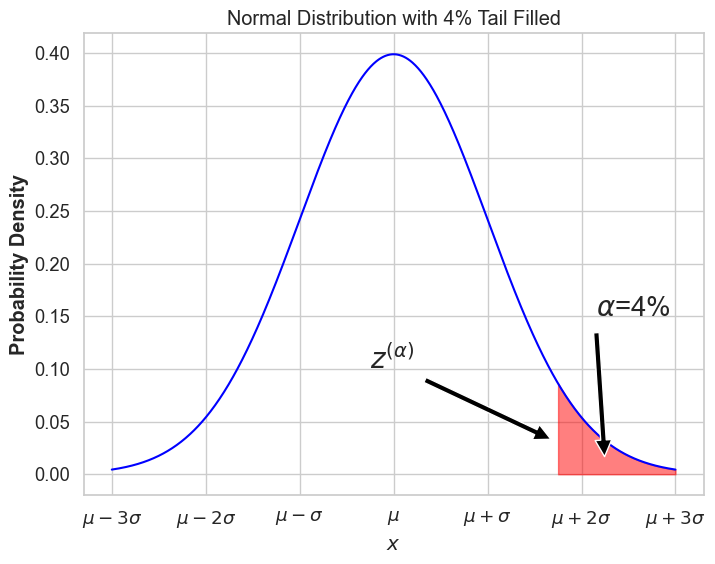

In [121]:
alpha = 0.04

z_alpha = norm.ppf(1 - alpha)
x = np.linspace(-3, 3, 1000)
pdf = norm.pdf(x)
fill_x = np.linspace(z_alpha, 3, 1000)
fill_y = norm.pdf(fill_x)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, pdf, 'b-')
ax.fill_between(fill_x, fill_y, color='r', alpha=0.5, label=r'$\alpha$')
  
ax.set_title(f'Normal Distribution with {alpha*100:.0f}% Tail Filled')
ax.set_xlabel(r'$x$')
ax.set_ylabel('Probability Density')
ax.set_xticks([-3, -2, -1, 0, 1, 2, 3])
ax.set_xticklabels([r'$\mu - 3\sigma$', r'$\mu - 2\sigma$', r'$\mu - \sigma$', r'$\mu$', r'$\mu + \sigma$', r'$\mu + 2\sigma$', r'$\mu + 3\sigma$'])
ax.annotate(r'$z^{(\alpha)}$', xy=(z_alpha, 0.03), xytext=(z_alpha-2, 0.1), arrowprops=dict(facecolor='black', shrink=0.05), fontsize=20)
ax.annotate(fr'$\alpha$={alpha*100:.0f}%', xy=(z_alpha+0.5, 0.01), xytext=(z_alpha+0.4, 0.15), arrowprops=dict(facecolor='black', shrink=0.05), fontsize=20)


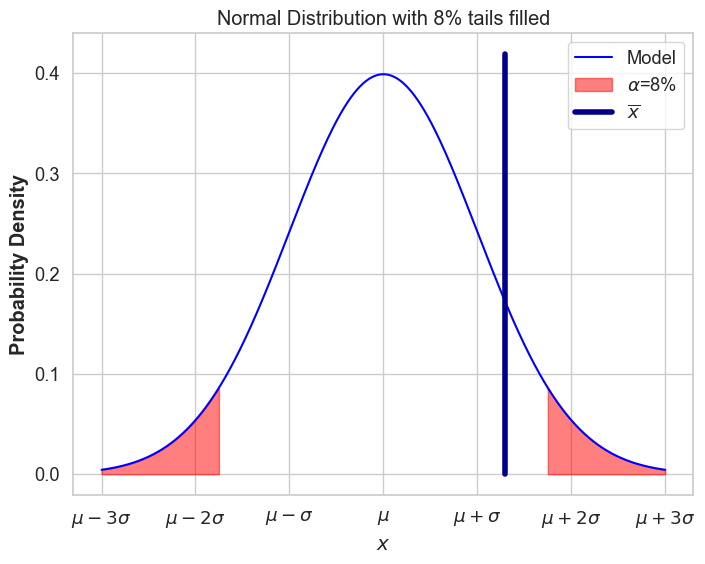

In [122]:
alpha = 0.08
z_alpha = norm.ppf(1 - alpha/2)
z_1_alpha = norm.ppf(alpha/2)

fill_x = np.linspace(z_alpha, 3, 1000)
fill_y = norm.pdf(fill_x)
fill_x_1 = np.linspace(-3, z_1_alpha, 1000)
fill_y_1 = norm.pdf(fill_x_1)
xbar = 1.3

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, pdf, 'b-', label='Model')
ax.fill_between(fill_x, fill_y, color='r', alpha=0.5, label=rf'$\alpha$={alpha*100:.0f}%')
ax.fill_between(fill_x_1, fill_y_1, color='r', alpha=0.5)
ax.plot([xbar, xbar], [0, ax.get_ylim()[1]], color='darkblue', linewidth=4, label="$\overline{x}$")

ax.set_title(f'Normal Distribution with {alpha*100:.0f}% tails filled')
ax.set_xlabel(r'$x$')
ax.set_ylabel('Probability Density')
ax.set_xticks([-3, -2, -1, 0, 1, 2, 3])
ax.set_xticklabels([r'$\mu - 3\sigma$', r'$\mu - 2\sigma$', r'$\mu - \sigma$', r'$\mu$', r'$\mu + \sigma$', r'$\mu + 2\sigma$', r'$\mu + 3\sigma$'])
plt.legend()

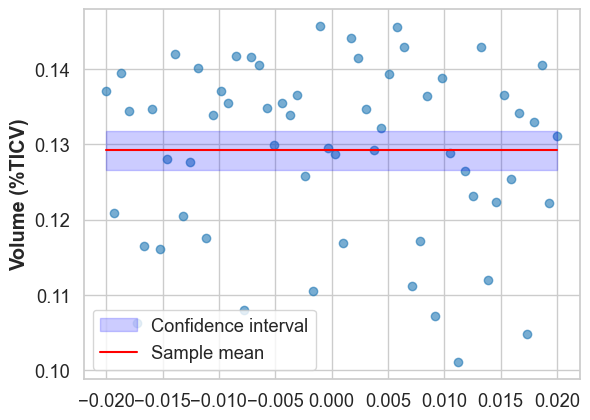

In [123]:
xbar = np.mean(cblmSample)
SEM = np.std(cblmSample, ddof=1) / np.sqrt(len(cblmSample))

conf_interval_min = xbar - z_alpha*SEM
conf_interval_max = xbar + z_alpha*SEM

jitter_width = 0.02
x_jitter = np.linspace(start=-jitter_width, stop=jitter_width, num=len(cblmSample))

fig, ax = plt.subplots()

ax.scatter(x_jitter, cblmSample, alpha=0.6)
rect = plt.Rectangle([-jitter_width, conf_interval_min], 
                     width=jitter_width*2, height=conf_interval_max - conf_interval_min, 
                     color='blue', alpha=0.2, label='Confidence interval')
ax.add_patch(rect)
ax.plot([-jitter_width,jitter_width], [xbar, xbar], color='red', linestyle='-', label='Sample mean')

ax.set_xlabel('')
ax.set_ylabel('Volume (%TICV)')
ax.legend()


# plt.title('Data with Confidence Interval and Sample Mean')

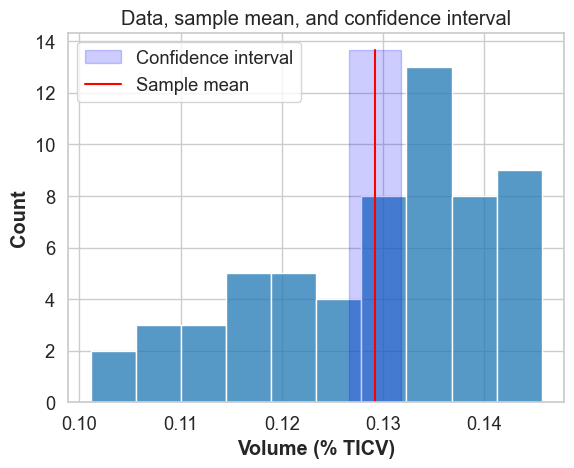

In [124]:
plt.figure()

n_bins = 10
xbar = np.mean(cblmSample)

# Plot a histogram of the sample using Seaborn
sns.histplot(data=cblmSample, kde=False, bins=10)
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

ax = plt.gca()
ymax = ax.get_ylim()[1]

rect = plt.Rectangle([conf_interval_min, 0], 
                     width=conf_interval_max-conf_interval_min, height=ymax, 
                     color='blue', alpha=0.2, label='Confidence interval')
ax.add_patch(rect)
ax.plot([xbar, xbar], [0, ymax], color='red', linestyle='-', label='Sample mean')

plt.xlabel('Volume (% TICV)')
plt.ylabel('Count')
plt.title('Data, sample mean, and confidence interval')
plt.legend()

### Bone mineral density example
Data generated on the basis of data in Emaus AmJEpidem 2006. I used the mean and confidence interval of the 45-49 age group to calculate the population standadrd deviation and then generated samples of the size in the paper.

[Original paper](https://academic.oup.com/aje/article/163/5/441/61104)

In [125]:
N_men = 166
DBMD_men = norm.rvs(loc=-1.49, scale=2.30, size=N_men)
N_women = 33
DBMD_women = norm.rvs(loc=-2.47, scale=2.68, size=N_women)

DBMD = pd.DataFrame()

In [126]:
# this is how I back-calculated the population standard deviation
c = [-3.39, -1.56]
dc = c[1]-c[0]
N = 33
s = np.sqrt(N)*(dc/2)/norm.ppf(1 - 0.025)
print(s)

2.6818221472655224


In [127]:
# Combine the two samples into a single Data Frame.
data = pd.DataFrame({
    'DBMD': np.concatenate((DBMD_men, DBMD_women)),
    'gender': ['men'] * len(DBMD_men) + ['women'] * len(DBMD_women)
})


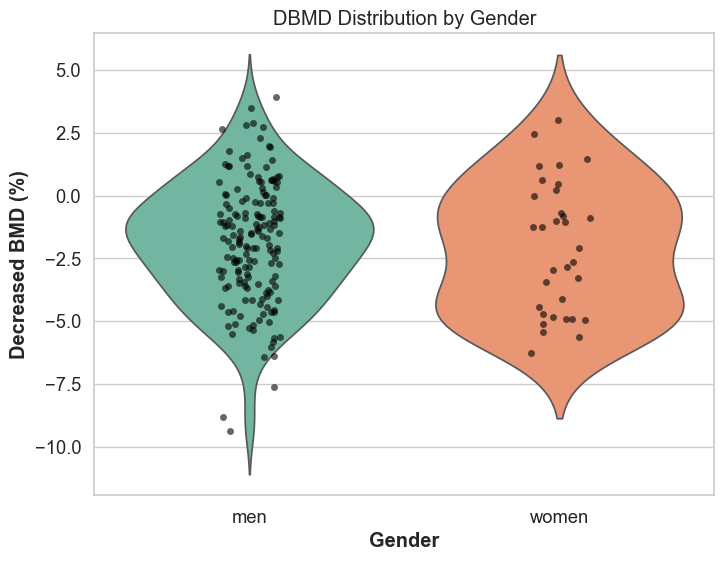

In [128]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='gender', y='DBMD', hue='gender', data=data, inner=None, palette='Set2')
sns.stripplot(x='gender', y='DBMD', color='black', data=data, jitter=True, alpha=0.6)
plt.title('DBMD Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Decreased BMD (%)')
plt.show()

In [129]:
summary = (
    data.groupby('gender')['DBMD']
    .agg(['mean', 'std', 'count'])
    .rename(columns={'mean': 'Mean', 'std': 'SD', 'count': 'N'})
)

combined_sd = np.sqrt(
    (
        (summary.loc['men', 'N'] - 1) * summary.loc['men', 'SD']**2 + 
        (summary.loc['women', 'N'] - 1) * summary.loc['women', 'SD']**2
    ) / (summary['N'].sum() - 2)
)

raw_effect = summary.loc['men', 'Mean'] - summary.loc['women', 'Mean']
cohens_d = raw_effect / combined_sd

results = pd.DataFrame({
    'Sample Means (%)': summary['Mean'],
    'Raw Effect (%)': [raw_effect, None],
    "Cohen's d": [cohens_d, None]
})

print(f'{combined_sd=}')
print(results)

combined_sd=2.418469762498346
        Sample Means (%)  Raw Effect (%)  Cohen's d
gender                                             
men            -1.833437        0.252143   0.104257
women          -2.085580             NaN        NaN


In [130]:
summary['SEM'] = summary['SD'] / np.sqrt(summary['N'])
alpha = 0.08
z_alpha = norm.ppf(1 - alpha/2)
summary['CI_low'] = summary['Mean']-summary['SEM']*z_alpha
summary['CI_high'] = summary['Mean']+summary['SEM']*z_alpha

print(f'{z_alpha=}')
summary

z_alpha=1.7506860712521692


,Mean,SD,N,SEM,CI_low,CI_high
gender,,,,,,
men,-1.833437,2.381185,166,0.184816,-2.156992,-1.509883
women,-2.085580,2.602253,33,0.452994,-2.878630,-1.292529


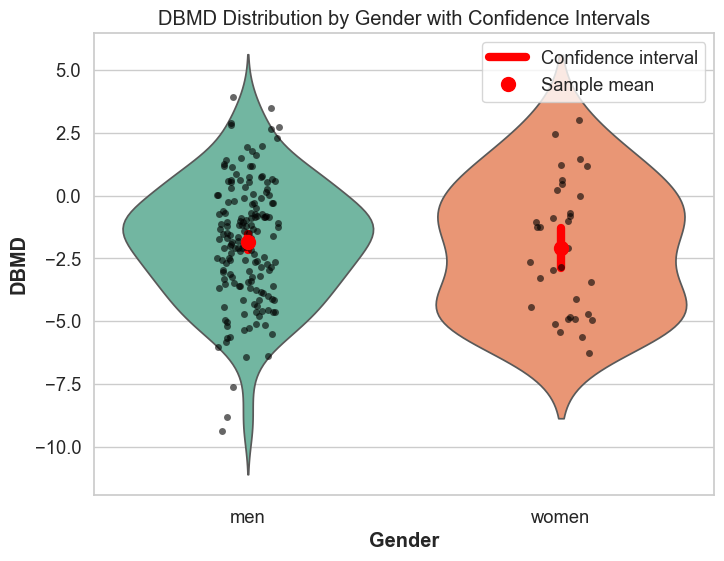

In [131]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='gender', y='DBMD', hue='gender', data=data, inner=None, palette='Set2')
sns.stripplot(x='gender', y='DBMD', data=data, jitter=True, color='black', alpha=0.6)

# Add confidence intervals
for i, gender in enumerate(summary.index):
    mean = summary.loc[gender, 'Mean']
    ci_low = summary.loc[gender, 'CI_low']
    ci_high = summary.loc[gender, 'CI_high']
    h_ci = plt.plot([i, i], [ci_low, ci_high], color='red', linestyle='-', linewidth=6)  # CI line
    h_xbar = plt.plot(i, mean, 'o', color='red', markersize=10, zorder=3)  # Mean point

h_ci[0].set_label('Confidence interval')
h_xbar[0].set_label('Sample mean')

plt.title('DBMD Distribution by Gender with Confidence Intervals')
plt.xlabel('Gender')
plt.ylabel('DBMD')
plt.legend()

## The confidence interval and the t distribution

### Testing the width of the normal confidence interval

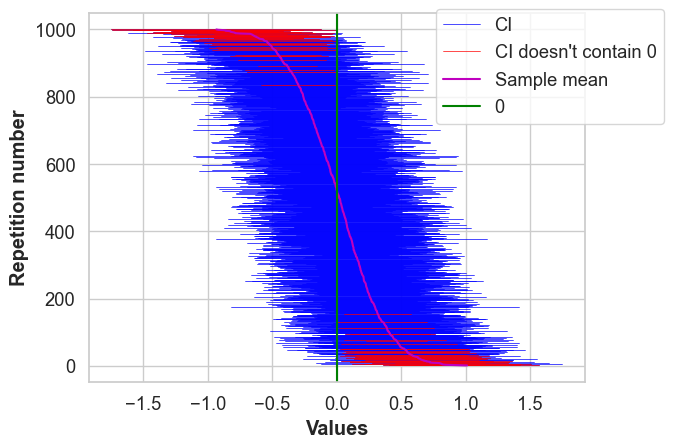

In [132]:
X025 = norm.ppf(0.025)
X975 = norm.ppf(0.975)

N = 10
NumReps = 1000
Samples = norm.rvs(0, 1, size=(N, NumReps))
SampleMean = np.mean(Samples, axis=0)
SampleStd = np.std(Samples, axis=0, ddof=1)
MeanStd = SampleStd/np.sqrt(N)

ConfLow = SampleMean + X025*MeanStd
ConfHigh = SampleMean + X975*MeanStd

Conf = np.vstack((ConfLow, ConfHigh, SampleMean)).T
SortedConf = Conf[Conf[:, 2].argsort()]
SortedNoZero = np.logical_or(SortedConf[:, 0] > 0, SortedConf[:, 1] < 0)
YVals = np.vstack((np.arange(NumReps, 0, -1), np.arange(NumReps, 0, -1)))

fig, ax = plt.subplots()
ax.plot(SortedConf[:, 0:2].T, YVals, 'b-', linewidth=0.5, label="CI")
ax.plot(SortedConf[SortedNoZero, 0:2].T, YVals[:, SortedNoZero], 'r-', linewidth=0.5, label="CI doesn't contain 0")
ax.plot(SortedConf[:, 2], YVals[0,:].T, 'm-', linewidth=1.5, label="Sample mean")
ax.axvline(x=0, color='g', label="0")
ax.set_xlabel('Values')
ax.set_ylabel('Repetition number')

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc=[0.7, 0.7])

#### Find number of confidence intervals that don't contain 0

In [133]:
NoZero = np.where(np.logical_or(ConfLow > 0, ConfHigh < 0))[0]
NumNoZero = len(NoZero)
PNoZero = NumNoZero/NumReps

print(f"NumNoZero = {NumNoZero}")
print(f"PNoZero = {PNoZero}")

NumNoZero = 80
PNoZero = 0.08


#### Do it for different sample sizes

### Show t distribution

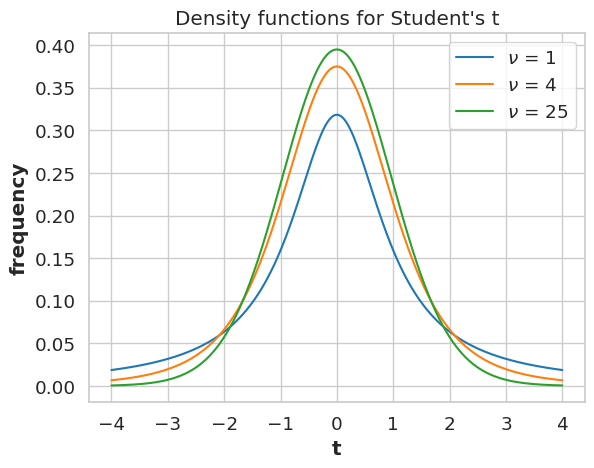

In [ ]:
AllNu = [1, 4, 25]
NumNu = len(AllNu)
XVals = np.arange(-4, 4.01, 0.01)
NumX = len(XVals)
tPDF = t.pdf(np.tile(XVals, (NumNu, 1)).T, np.tile(AllNu, (NumX, 1)))

plt.figure()
plt.plot(XVals, tPDF)
plt.xlabel('t')
plt.ylabel('frequency')
plt.title("Density functions for Student's t")
plt.legend([rf"$\nu$ = {nu}" for nu in AllNu])

### Redo test of confidence interval with t based interval

In [134]:
NumReps = 50000

AllNs = np.concatenate([np.arange(4, 11, 2), np.arange(20, 101, 10)])
NumNs = len(AllNs)

PNoZero = np.zeros(NumNs)
for NNum in range(NumNs):
    N = AllNs[NNum]
    Samples = norm.rvs(0, 1, size=(N, NumReps))
    SampleMean = np.mean(Samples, axis=0)
    SampleStd = np.std(Samples, axis=0, ddof=1)
    MeanStd = SampleStd/np.sqrt(N)

    ConfLow = SampleMean + X025*MeanStd
    ConfHigh = SampleMean + X975*MeanStd

    NoZero = np.where((ConfLow > 0) | (ConfHigh < 0))[0]
    NumNoZero = len(NoZero)
    PNoZero[NNum] = NumNoZero/NumReps


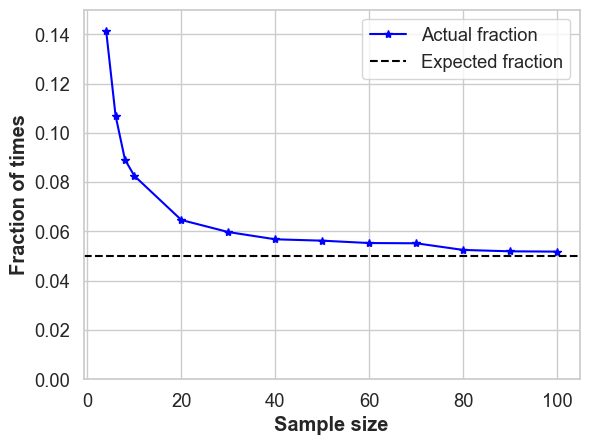

In [135]:
plt.figure()
plt.plot(AllNs, PNoZero, 'b-*', label="Actual fraction")
plt.axhline(0.05, color='k', linestyle='--', label="Expected fraction")
plt.xlabel('Sample size')
plt.ylabel('Fraction of times')
plt.ylim([0, 0.15])
plt.legend()

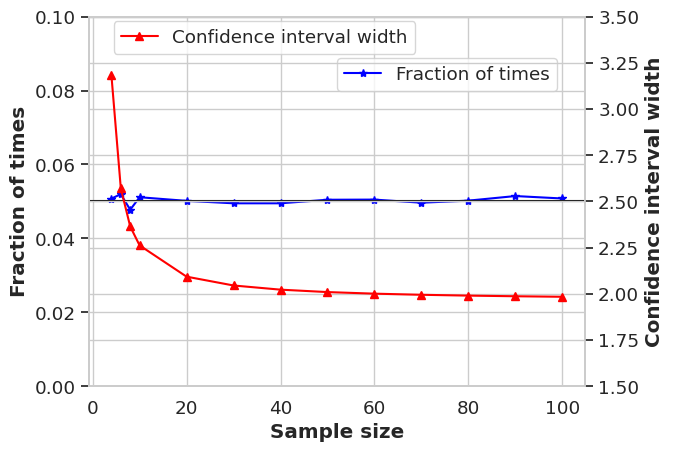

In [ ]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(AllNs, PNoZero, 'b-*', label='Fraction of times')
ax2.plot(AllNs, talpha, 'r-^', label='Confidence interval width')
ax2.set_ylim([1.5, 3.5])
ax.set_xlabel('Sample size')
ax.set_ylabel('Fraction of times')
ax2.set_ylabel('Confidence interval width')
ax.set_ylim([0, 0.1])
ax2.legend(loc=[0.05, 0.9])
ax.legend(loc=[0.5, 0.8])
ax.axhline(y=0.05, color='k', linestyle='-')

## The distribution of the sample variance

### Show data, sample mean, and model

Text(0.15, 0.7, '$\\bar{x} = 0.13$\n$\\sigma^2 = 0.00013$')

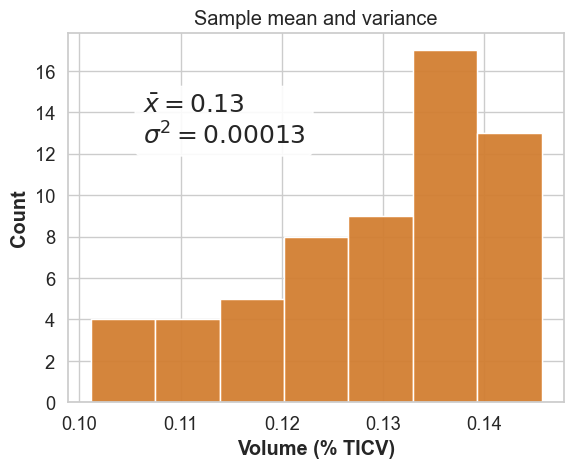

In [137]:
x_bar = np.mean(cblmSample)
s2_x = np.var(cblmSample)
n_sample = len(cblmSample)

# plot a histogram of the sampled data using seaborn
sns.histplot(cblmSample, bins='auto')

# get the bin edges from the histogram plot
x_bin_edges = sns.histplot(cblmSample, bins='auto').get_xticks()

# get the y and x limits of the plot
y_lim = plt.ylim()
x_lim = plt.xlim()

# add plot labels and title
plt.xlabel('Volume (% TICV)')
plt.ylabel('Count')
plt.title('Sample mean and variance')

# add annotations to the plot
plt.annotate(f'$\\bar{{x}} = {x_bar:.2f}$\n$\\sigma^2 = {s2_x:.5f}$', 
             xy=(0.15, 0.70), xycoords='axes fraction',
             bbox=dict(boxstyle='round', fc='w', alpha=0.9),
             fontsize=18)

### Bootstrap sample the data to get sample variances


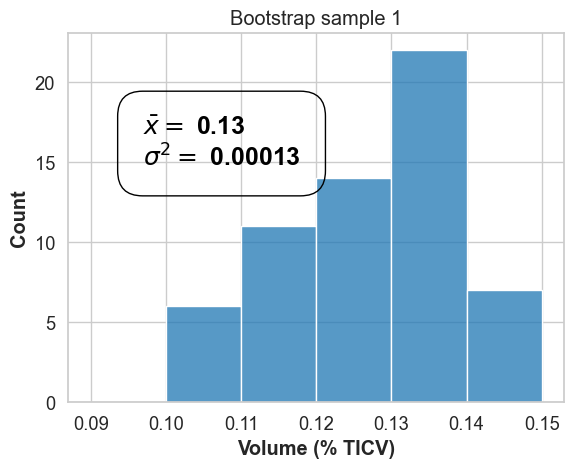

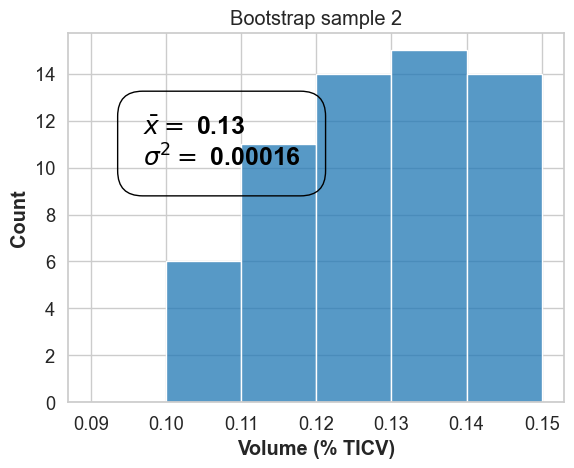

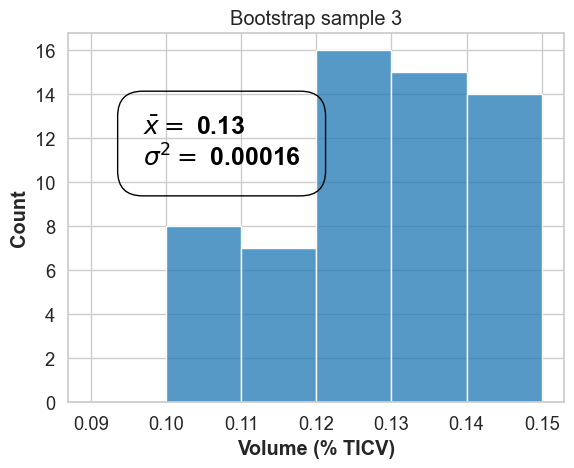

In [138]:
for bootN in range(1, 4):
    boot_indices = np.random.choice(len(cblmSample), size=n_sample, replace=True)
    bootX = cblmSample.iloc[boot_indices]

    fig, ax = plt.subplots()
    sns.histplot(bootX, ax=ax, bins=x_bin_edges)
    ax.set(xlabel='Volume (% TICV)', ylabel='Count', 
           title='Sample mean and variance')
    annotation_text = [r'$\bar{x} =$ ' + f'{np.mean(bootX):.2f}',
                       r'$\sigma^2 =$ ' + f'{np.var(bootX):.5f}']
    ax.annotate('\n'.join(annotation_text), xy=(0.15, 0.70), 
                xycoords='axes fraction', fontsize=18, 
                fontweight='bold', color='black', 
                bbox=dict(facecolor='none', edgecolor='black', 
                          boxstyle='round,pad=1'), 
                horizontalalignment='left', verticalalignment='center')
    ax.set_title(f'Bootstrap sample {bootN}')

#### Get a full picture of the distribution

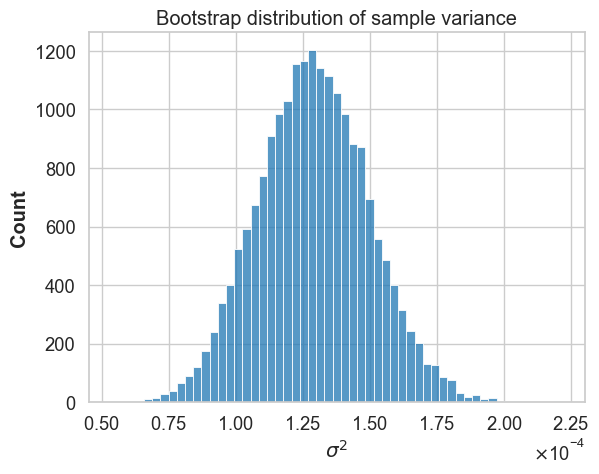

In [141]:
num_boot = 20000
boot_indices = np.random.choice(len(cblmSample), size=(n_sample, num_boot), replace=True)
bootX = cblmSample.values[boot_indices]
boot_var = np.var(bootX, axis=0)

def var_distribution_plot():
  plt.figure()
  bins = np.histogram_bin_edges(boot_var, bins='rice')
  var_boot_hist = sns.histplot(boot_var, bins=bins, kde=False)
  var_boot_hist.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
  var_boot_hist.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
  plt.xlabel('$\sigma^2$')
  plt.ylabel('Count')
  plt.title('Bootstrap distribution of sample variance')
  return bins

bins = var_distribution_plot()

#### Add a normal model

Mean = 0.00012893796085708612
Std = 2.065032928839915e-05


[Text(0.5, 29.0, '$\\sigma^2$'),
 Text(29.0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Bootstrap distribution of sample variance with Normal approximation')]

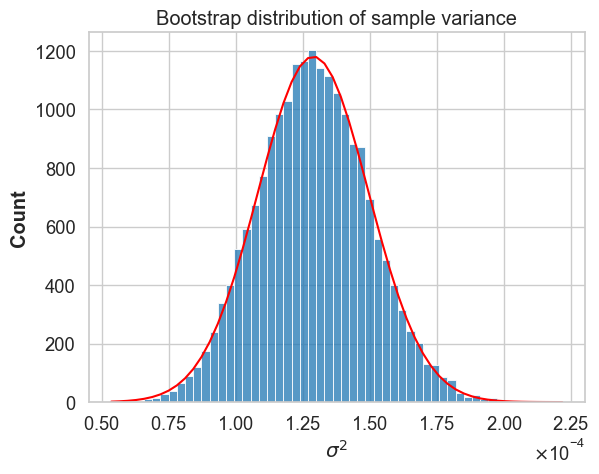

In [142]:
var_mean = np.mean(boot_var)
var_std = np.std(boot_var)
print(f"Mean = {var_mean}")
print(f"Std = {var_std}")

var_normal_model = norm(loc=var_mean, scale=var_std)


var_x = var_distribution_plot()
d_x = var_x[1] - var_x[0]
sns.lineplot(x=var_x, y=var_normal_model.pdf(var_x)*num_boot*d_x, color='red')
ax.set(xlabel=r'$\sigma^2$', ylabel='Count', title='Bootstrap distribution of sample variance with Normal approximation')


### Bootstrapped sample variance for different N

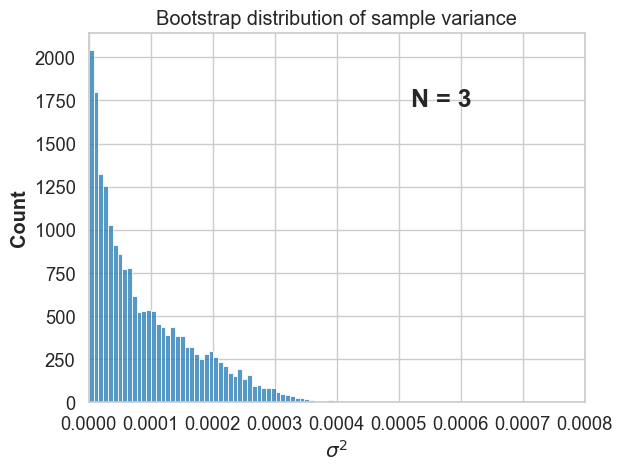

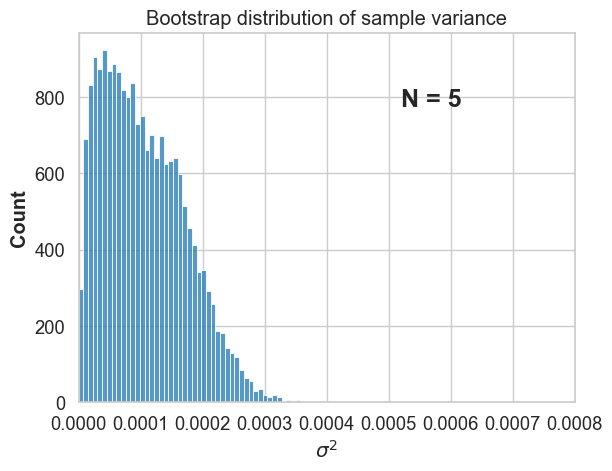

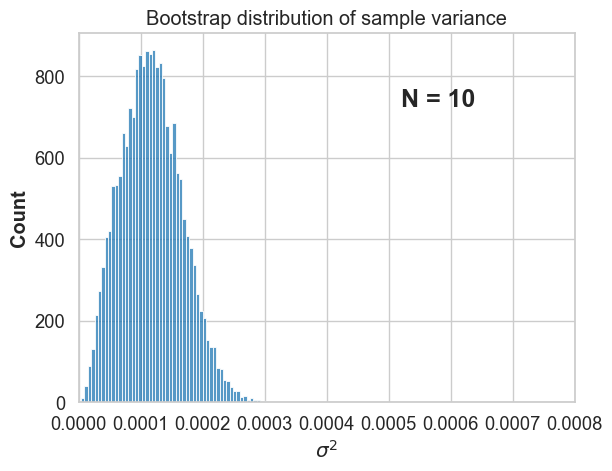

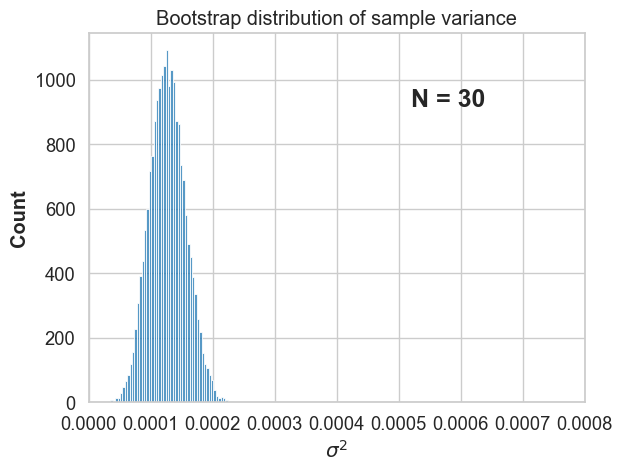

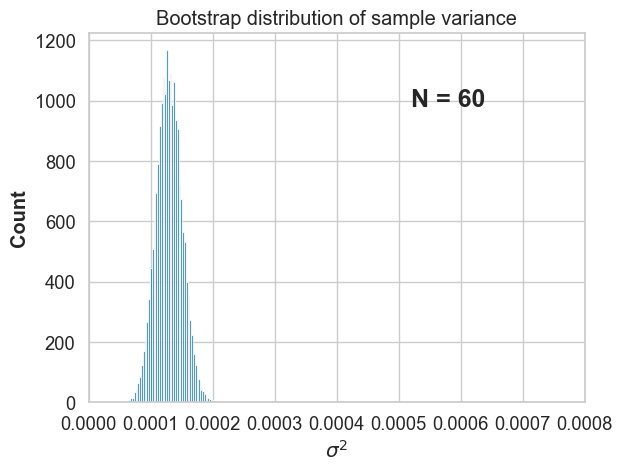

In [143]:
num_boot = 20000
all_n = [3, 5, 10, 30, 60]
num_n = len(all_n)

# Define function to create histogram plot
def create_hist_plot(n):
    boot_x = cblmSample.values[np.random.randint(n_sample, size=(this_n, num_boot))]
    boot_var = np.var(boot_x, axis=0)

    plt.figure()
    bins = np.histogram_bin_edges(boot_var, bins='rice')
    var_boot_hist = sns.histplot(boot_var, bins=bins, kde=False)
    plt.xlabel('$\sigma^2$')
    plt.ylabel('Count')
    plt.title('Bootstrap distribution of sample variance')
    plt.xlim([0, 8e-4])
    plt.annotate('N = ' + str(n), xy=(0.65, 0.8), xycoords='axes fraction',
                 fontsize=18, fontweight='bold')
    return bins

# Loop over allN and create histogram plot for each N value
for n_num in range(num_n):
    this_n = all_n[n_num]

    create_hist_plot(this_n)


### Chi squared distribution

Nu = 3
Mean = 3.0
S.D. = 2.449489742783178
Nu = 5
Mean = 5.0
S.D. = 3.1622776601683795
Nu = 10
Mean = 10.0
S.D. = 4.47213595499958
Nu = 30
Mean = 30.0
S.D. = 7.745966692414834
Nu = 60
Mean = 60.0
S.D. = 10.954451150103322


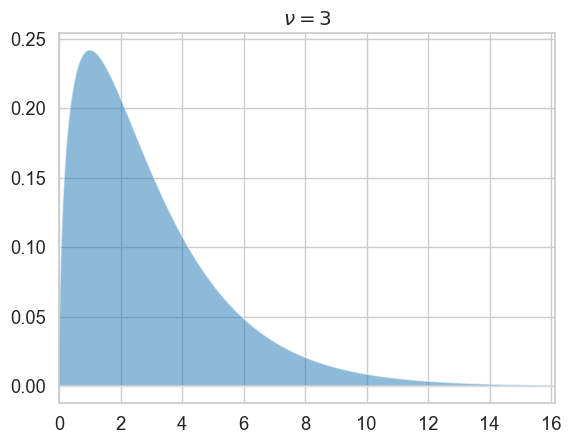

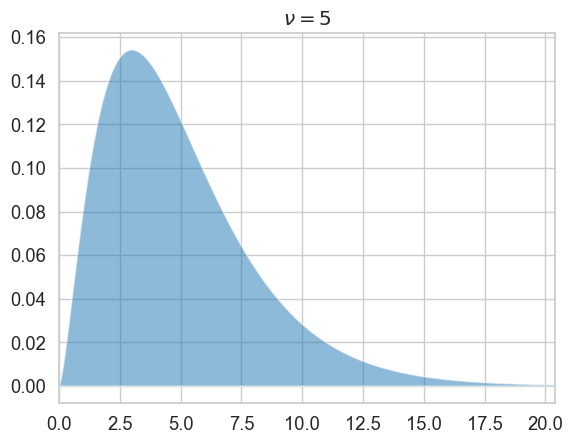

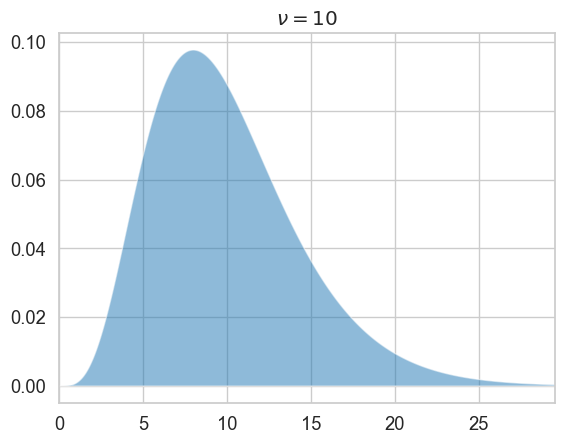

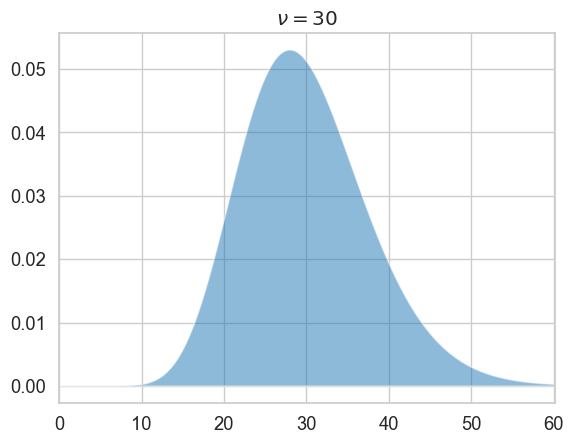

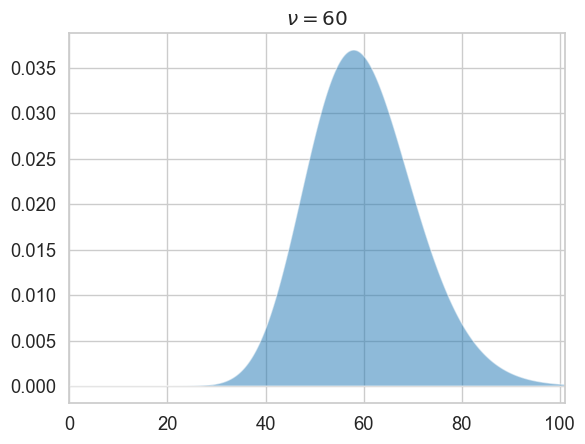

In [146]:
all_nu = all_n
num_nu = len(all_nu)

for nu_num in range(num_nu):
    nu = all_nu[nu_num]
    x_vals = np.arange(0, 400.01, 0.01)
    chi2_pdf = chi2.pdf(x_vals, nu)
    max_x = x_vals[np.where(chi2_pdf > 0.001)[0][-1]]

    fig, ax = plt.subplots()
    ax.fill_between(x_vals, chi2_pdf, alpha=0.5)
    ax.set_xlim([0, max_x * 1.1])
    ax.set_title(f"$\\nu = {nu}$")

    chi2_mean, chi2_var = chi2.stats(nu, moments="mv")
    print(f"Nu = {nu}")
    print(f"Mean = {chi2_mean}")
    print(f"S.D. = {np.sqrt(chi2_var)}")


#### Now superimpose the chi squared onto the bootstrapped histogram

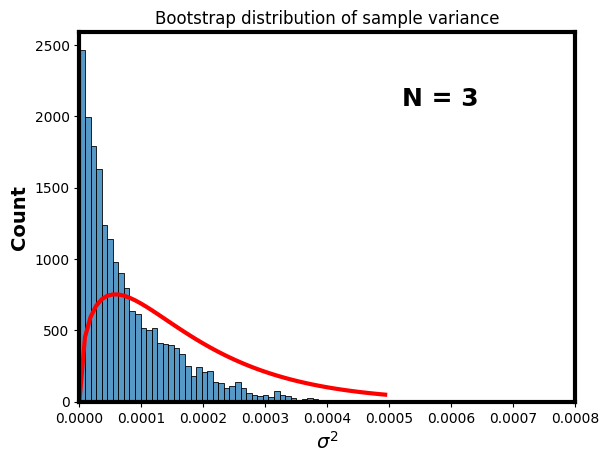

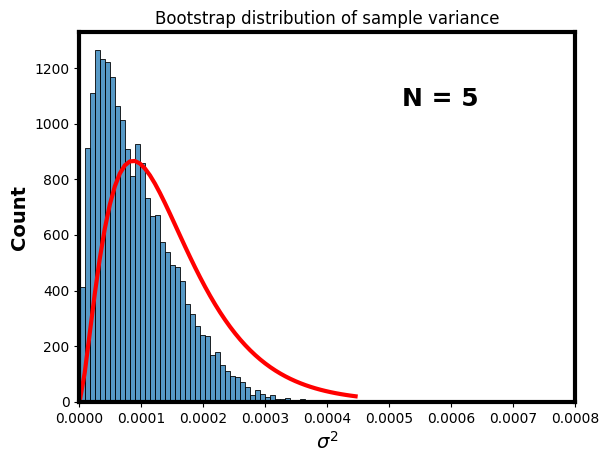

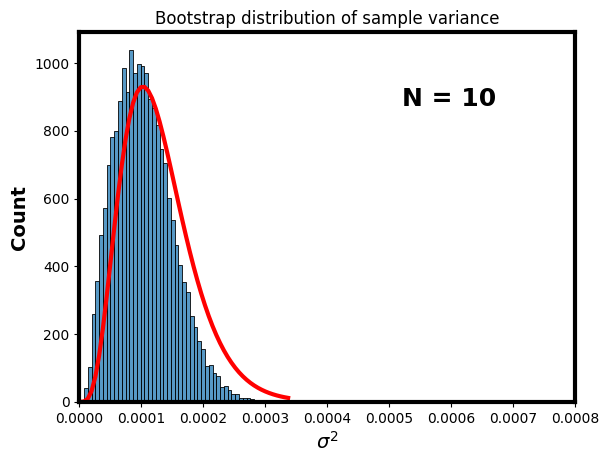

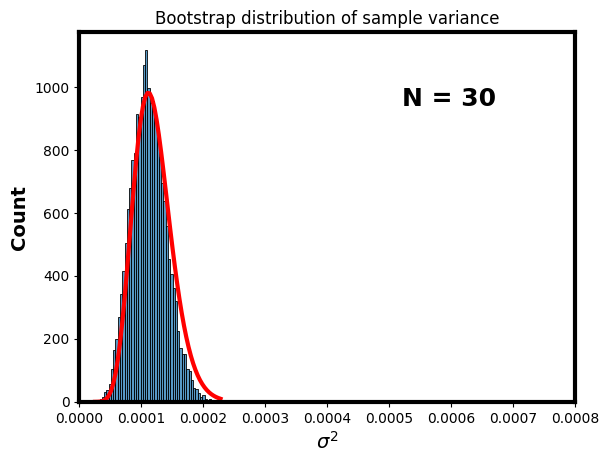

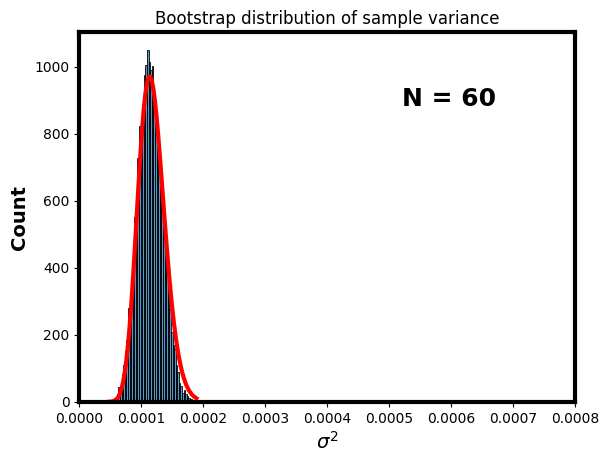

In [ ]:
for this_n in all_n:    
    hist_x = create_hist_plot(this_n)

    hist_n = num_boot
    d_x = hist_x[1] - hist_x[0]
    
    # Calculate correction factor based on variance
    s2 = np.var(cblmSample)
    correction_factor = s2 / (this_n - 1)
    
    # Correct the histogram data
    corrected_x = hist_x / correction_factor
    corrected_d_x = d_x / correction_factor
    
    # Plot the chi-squared distribution on top of the histogram
    plt.plot(hist_x, chi2.pdf(corrected_x, this_n) * hist_n * corrected_d_x, color='r')
    


#### Corrected fit to bootstrap

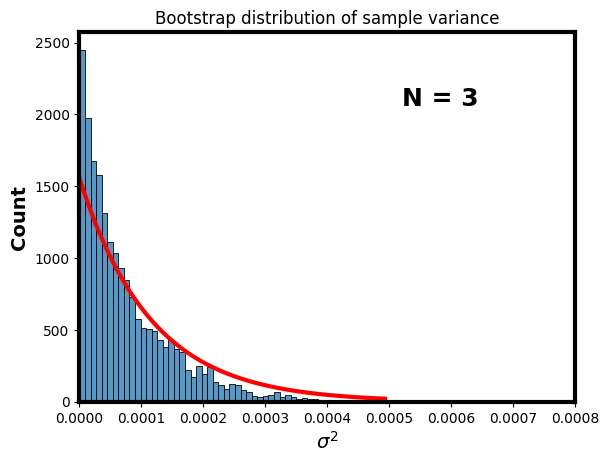

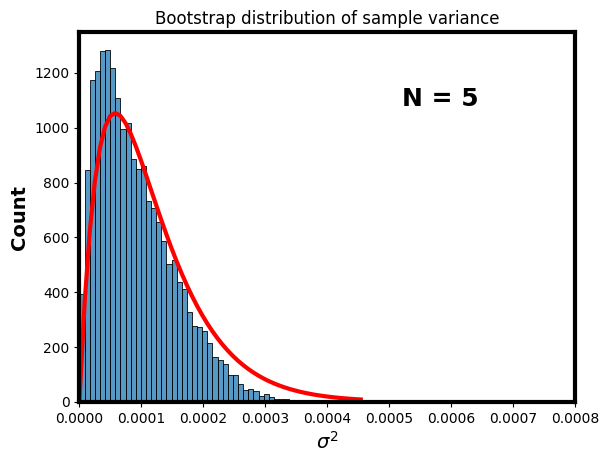

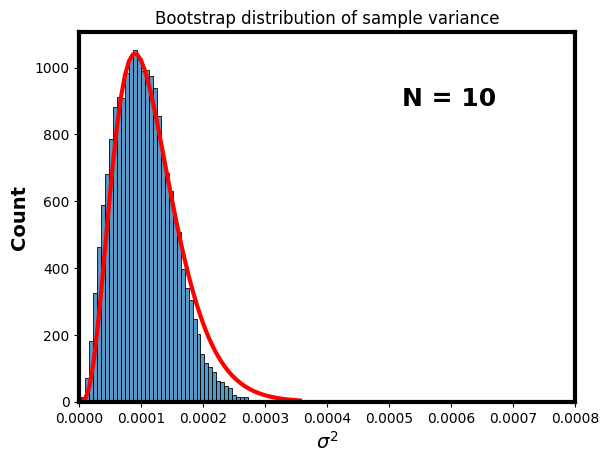

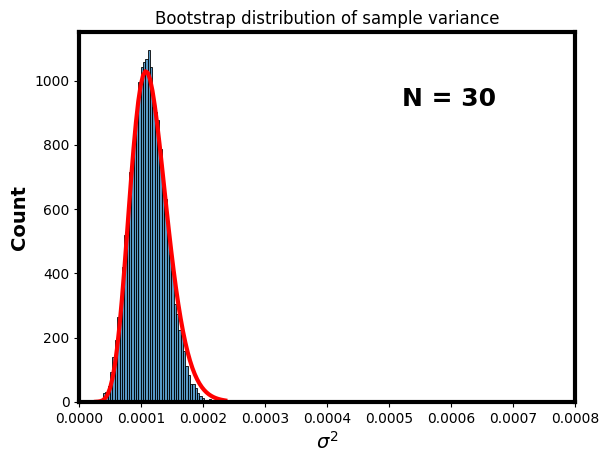

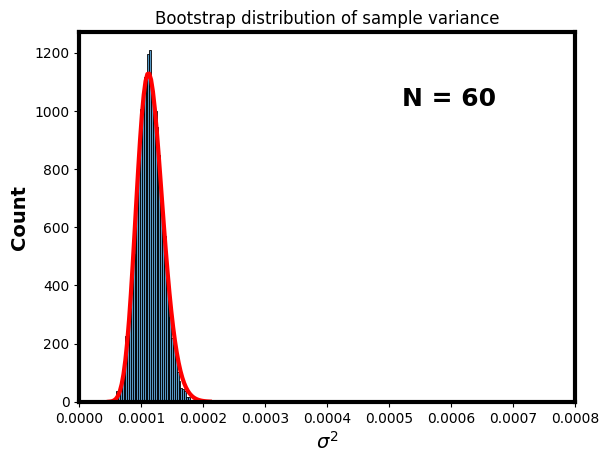

In [ ]:
for this_n in all_n:    
    hist_x = create_hist_plot(this_n)

    hist_n = num_boot
    d_x = hist_x[1] - hist_x[0]
    
    # Calculate correction factor based on variance
    s2 = np.var(cblmSample)
    correction_factor = s2 / (this_n - 1)
    
    # Correct the histogram data
    corrected_x = hist_x / correction_factor
    corrected_d_x = d_x / correction_factor
    
    # Plot the chi-squared distribution on top of the histogram
    plt.plot(hist_x, chi2.pdf(corrected_x, this_n-1) * hist_n * corrected_d_x, color='r')
    


In [108]:
NumReps = 50000

AllNs = np.concatenate((np.arange(4, 11, 2), np.arange(20, 101, 10)))
NumNs = len(AllNs)

PNoZero = np.zeros(NumNs)
talpha = np.zeros(NumNs)
for NNum in range(NumNs):
    N = AllNs[NNum]
    X025 = t.ppf(0.025, N-1)
    X975 = t.ppf(0.975, N-1)

    Samples = norm.rvs(loc=0, scale=1, size=(N, NumReps))
    SampleMean = np.mean(Samples, axis=0)
    SampleStd = np.std(Samples, axis=0, ddof=1)
    MeanStd = SampleStd/np.sqrt(N)

    ConfLow = SampleMean + X025*MeanStd
    ConfHigh = SampleMean + X975*MeanStd

    NoZero = np.where((ConfLow > 0) | (ConfHigh < 0))[0]
    NumNoZero = len(NoZero)
    PNoZero[NNum] = NumNoZero/NumReps
    talpha[NNum] = X975



## Comparing the variance of two groups

### Generate a sample of old and young cerebella

Text(0.2, 0.6, '$\\sigma_{old} = 0.009416828922933903$\n$\\sigma_{young} = 0.008173637661610736$')

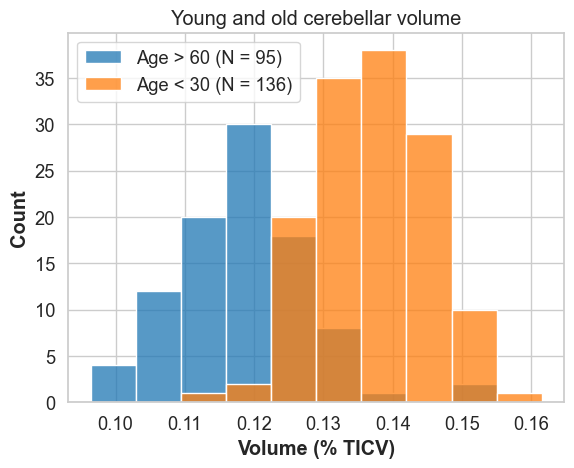

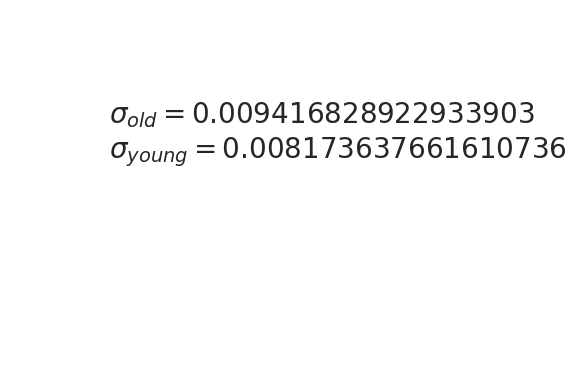

In [147]:
ages = d['Age']
old_cerebellum_sample = d.loc[ages > 60, 'TCV_Corr']
young_cerebellum_sample = d.loc[ages < 30, 'TCV_Corr']
n_old = len(old_cerebellum_sample)
n_young = len(young_cerebellum_sample)

# Plot histograms
bins = np.histogram_bin_edges(pd.concat([old_cerebellum_sample, young_cerebellum_sample]))
sns.histplot(old_cerebellum_sample, bins=bins, label=f'Age > 60 (N = {n_old})')
sns.histplot(young_cerebellum_sample, bins=bins, label=f'Age < 30 (N = {n_young})')
plt.xlabel('Volume (% TICV)')
plt.ylabel('Count')
plt.title('Young and old cerebellar volume')
plt.legend()

# Calculate standard deviations and add text to figure
std_old = np.std(old_cerebellum_sample)
std_young = np.std(young_cerebellum_sample)
plt.figure()
plt.axis('off')
plt.text(0.2, 0.6, r'$\sigma_{old} = ' + str(std_old) + '$\n$\sigma_{young} = ' + str(std_young) + '$', fontsize=20, fontweight='bold', ha='left')

### Compare chi square distributions for two variances

Text(0.2, 0.2, '$F = 1.327$')

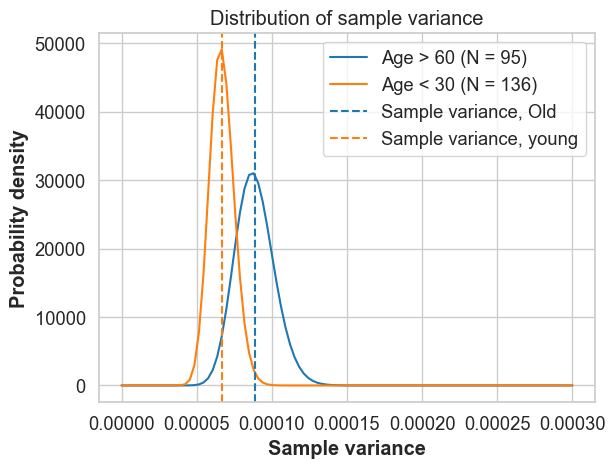

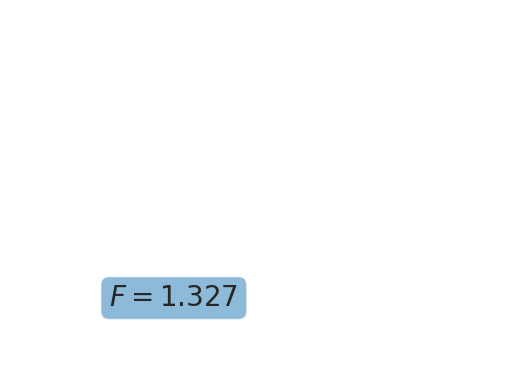

In [148]:
var_x = np.linspace(0, 3*0.01**2, 100)

fig, ax = plt.subplots()
h_old = ax.plot(var_x, chi2.pdf((var_x*(n_old-1))/(std_old**2), n_old-1)*(n_old-1)/(std_old**2), label='Age > 60 (N = {0})'.format(n_old))
h_young = ax.plot(var_x, chi2.pdf((var_x*(n_young-1))/(std_young**2), n_young-1)*(n_young-1)/(std_young**2), label='Age < 30 (N = {0})'.format(n_young))
ax.axvline(x=std_old**2, linestyle='--', color=h_old[0].get_color(), label='Sample variance, Old')
ax.axvline(x=std_young**2, linestyle='--', color=h_young[0].get_color(), label='Sample variance, young')
ax.set_ylabel('Probability density')
ax.set_xlabel('Sample variance')
ax.set_title('Distribution of sample variance')
ax.legend()

F = std_old**2 / std_young**2
fig2, ax2 = plt.subplots()
ax2.axis('off')
ax2.text(0.2, 0.2, f'$F = {F:.3f}$', fontsize=20, fontweight='bold', bbox=dict(boxstyle="round", alpha=0.5))